<a href="https://colab.research.google.com/github/lognorman20/stockx_competiton/blob/master/notebooks/basic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [ ]:
# Reading in the data
shoe_data = pd.read_csv('/Users/logno/Documents/Home/BAF1/ds_shoe_proj/Clean_Shoe_Data.csv', parse_dates = True)
df = shoe_data.copy()
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,565,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,598,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,605,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,650,220,2018-12-26,11.0,California


In [ ]:
# Checking for missing values in the dataset
nulls = pd.concat([df.isnull().sum()], axis=1)
nulls[nulls.sum(axis=1) > 0]

,0


In [ ]:
df.shape

(99956, 8)

In [ ]:
df.info

<bound method DataFrame.info of        Order Date   Brand                                   Sneaker Name  \
0      2017-09-01   Yeezy           Adidas Yeezy Boost 350 Low V2 Beluga   
1      2017-09-01   Yeezy    Adidas Yeezy Boost 350 V2 Core Black Copper   
2      2017-09-01   Yeezy     Adidas Yeezy Boost 350 V2 Core Black Green   
3      2017-09-01   Yeezy       Adidas Yeezy Boost 350 V2 Core Black Red   
4      2017-09-01   Yeezy  Adidas Yeezy Boost 350 V2 Core Black Red 2017   
...           ...     ...                                            ...   
99951  2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99952  2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99953  2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99954  2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99955  2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   

       Sale Price  Retail Price Release Date  Shoe Size

In [ ]:
df.describe()

,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634719,208.61359,9.344181
std,255.982969,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [ ]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [ ]:
# Renaming columns to get rid of spaces 
df = df.rename(columns={
    "Order Date": "Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region"
    })

In [ ]:
# Converting dates into numericals
import datetime as dt

df['Order_date'] = pd.to_datetime(df['Order_date'])
df['Order_date']=df['Order_date'].map(dt.datetime.toordinal)

df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date']=df['Release_Date'].map(dt.datetime.toordinal)

In [ ]:
# Starting the linear regression
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

X = df.drop(['Sale_Price'], axis=1)
y = df.Sale_Price
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
# Converting categorical data to numerical
from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name', 'Buyer_Region', 'Brand']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Adding the column names after one hot encoding
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)


## Model 1

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-1328137942701.155


In [ ]:
coeff_df = pd.DataFrame(lm.coef_, OH_X_train.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
Sneaker_Name_Nike Air VaporMax Off White,6.305035e+09
Sneaker_Name_Nike Air VaporMax Off White Black,5.936749e+09
Sneaker_Name_Nike Air VaporMax Off White 2018,5.909401e+09
Sneaker_Name_Nike React Hyperdunk 2017 Flyknit Off White,2.137039e+09
Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,1.896898e+09
...,...
Sneaker_Name_Nike Air Max 90 Off White Desert Ore,-1.964194e+09
Sneaker_Name_Nike Blazer Mid Off White,-3.466245e+09
Sneaker_Name_Nike Blazer Mid Off White Wolf Grey,-4.104363e+09
Sneaker_Name_Nike Blazer Mid Off White All Hallows Eve,-4.175468e+09


In [ ]:
predictions = lm.predict(OH_X_valid)

In [ ]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 59.69628150332399
MSE: 10444.134620274586
RMSE: 102.19654896460342


## Model 2

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(OH_X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(OH_X_train, y_train)

In [ ]:
list(zip(OH_X_train.columns,rfe.support_,rfe.ranking_))

[('Order_date', False, 98),
 ('Retail_Price', False, 96),
 ('Release_Date', False, 95),
 ('Shoe_Size', False, 97),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0', False, 5),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint', False, 7),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Copper', False, 2),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green', False, 3),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red 2017', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black White

In [ ]:
X_train_rfe = OH_X_train[OH_X_train.columns[rfe.support_]]
X_train_rfe

,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red 2017,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black White,Brand_Off-White
33985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    model = sm.OLS(y, X)
    results = model.fit() # fitting the model
    print(results.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(OH_X_train,y_train)

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4007.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:06:50   Log-Likelihood:            -4.8503e+05
No. Observations:               79964   AIC:                         9.703e+05
Df Residuals:                   79862   BIC:                         9.712e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [ ]:
results.pvalues.loc[results.pvalues > 0.05].index

Index(['Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green',
       'Sneaker_Name_Nike Air Force 1 Low Off White',
       'Sneaker_Name_Nike Air Max 90 Off White',
       'Sneaker_Name_Nike Air VaporMax Off White Black',
       'Buyer_Region_Alabama', 'Buyer_Region_Alaska', 'Buyer_Region_Arkansas',
       'Buyer_Region_Colorado', 'Buyer_Region_Connecticut',
       'Buyer_Region_Delaware', 'Buyer_Region_District of Columbia',
       'Buyer_Region_Georgia', 'Buyer_Region_Hawaii', 'Buyer_Region_Idaho',
       'Buyer_Region_Illinois', 'Buyer_Region_Indiana', 'Buyer_Region_Iowa',
       'Buyer_Region_Kansas', 'Buyer_Region_Louisiana', 'Buyer_Region_Maine',
       'Buyer_Region_Massachusetts', 'Buyer_Region_Michigan',
       'Buyer_Region_Minnesota', 'Buyer_Region_Mississippi',
       'Buyer_Region_Missouri', 'Buyer_Region_Montana',
       'Buyer_Region_Nebraska', 'Buyer_Region_Nevada',
       'Buyer_Region_New Hampshire', 'Buyer_Region_New Jersey',
       'Buyer_Region_New Mexico', 'Bu

In [ ]:
X_train_new = X_train_new.drop(['Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green',
       'Sneaker_Name_Nike Air Force 1 Low Off White',
       'Sneaker_Name_Nike Air Max 90 Off White',
       'Sneaker_Name_Nike Air VaporMax Off White Black',
       'Buyer_Region_Alabama', 'Buyer_Region_Alaska', 'Buyer_Region_Arkansas',
       'Buyer_Region_Colorado', 'Buyer_Region_Connecticut',
       'Buyer_Region_Delaware', 'Buyer_Region_District of Columbia',
       'Buyer_Region_Georgia', 'Buyer_Region_Hawaii', 'Buyer_Region_Idaho',
       'Buyer_Region_Illinois', 'Buyer_Region_Indiana', 'Buyer_Region_Iowa',
       'Buyer_Region_Kansas', 'Buyer_Region_Louisiana', 'Buyer_Region_Maine',
       'Buyer_Region_Massachusetts', 'Buyer_Region_Michigan',
       'Buyer_Region_Minnesota', 'Buyer_Region_Mississippi',
       'Buyer_Region_Missouri', 'Buyer_Region_Montana',
       'Buyer_Region_Nebraska', 'Buyer_Region_Nevada',
       'Buyer_Region_New Hampshire', 'Buyer_Region_New Jersey',
       'Buyer_Region_New Mexico', 'Buyer_Region_New York',
       'Buyer_Region_North Carolina', 'Buyer_Region_North Dakota',
       'Buyer_Region_Ohio', 'Buyer_Region_Oklahoma',
       'Buyer_Region_Pennsylvania', 'Buyer_Region_Rhode Island',
       'Buyer_Region_South Carolina', 'Buyer_Region_South Dakota',
       'Buyer_Region_Tennessee', 'Buyer_Region_Texas', 'Buyer_Region_Utah',
       'Buyer_Region_Vermont', 'Buyer_Region_Virginia',
       'Buyer_Region_Washington', 'Buyer_Region_West Virginia',
       'Buyer_Region_Wyoming'], axis=1)

In [ ]:
checkVIF(X_train_new)

,Features,VIF
59,Brand_Off-White,inf
58,Brand_ Yeezy,inf
3,Release_Date,20131.33
48,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,12665.62
49,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,10164.53
19,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,10155.76
50,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,6645.96
12,Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,4683.44
11,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga ...,4619.38
18,Sneaker_Name_Adidas Yeezy Boost 350 V2 Semi Fr...,2231.17


## Model 2

In [ ]:
X_train_new = build_model(X_train_new,y_train)

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     6978.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:07:06   Log-Likelihood:            -4.8505e+05
No. Observations:               79964   AIC:                         9.702e+05
Df Residuals:                   79905   BIC:                         9.708e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [ ]:
bruv = checkVIF(X_train_new)

## Model 3

In [ ]:
bruv.loc[bruv['VIF'] > 9999999].Features.to_list()

['Brand_Off-White', 'Brand_ Yeezy']

In [ ]:
X_train_new = X_train_new.drop(['Brand_Off-White', 'Brand_ Yeezy'], axis=1)

In [ ]:
best_X_train = build_model(X_train_new,y_train)

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7100.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:07:24   Log-Likelihood:            -4.8506e+05
No. Observations:               79964   AIC:                         9.702e+05
Df Residuals:                   79906   BIC:                         9.708e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [ ]:
bruv = checkVIF(best_X_train)
bruv

,Features,VIF
0,const,1.642982e+09
3,Release_Date,1.613900e+02
20,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,2.877000e+01
49,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,2.209000e+01
2,Retail_Price,2.147000e+01
19,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,2.035000e+01
17,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream W...,1.800000e+01
48,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,1.560000e+01
50,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,1.481000e+01
39,Sneaker_Name_Nike Blazer Mid Off White All Hal...,1.253000e+01


## Model 4

In [ ]:
X_train_new = best_X_train.drop(['Buyer_Region_Arizona'], axis=1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7226.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:07:49   Log-Likelihood:            -4.8506e+05
No. Observations:               79964   AIC:                         9.702e+05
Df Residuals:                   79907   BIC:                         9.708e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [ ]:
bruv = checkVIF(X_train_new)
bruv

,Features,VIF
0,const,1.642980e+09
3,Release_Date,1.613900e+02
20,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,2.877000e+01
49,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,2.209000e+01
2,Retail_Price,2.147000e+01
19,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,2.035000e+01
17,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream W...,1.800000e+01
48,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,1.560000e+01
50,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,1.481000e+01
39,Sneaker_Name_Nike Blazer Mid Off White All Hal...,1.253000e+01


## Model 5

In [ ]:
X_train_new = X_train_new.drop(['Sneaker_Name_Nike Air Max 97 Off White Black', 'Buyer_Region_Wisconsin' ], axis=1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7494.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:08:05   Log-Likelihood:            -4.8506e+05
No. Observations:               79964   AIC:                         9.702e+05
Df Residuals:                   79909   BIC:                         9.707e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [ ]:
bruv = checkVIF(X_train_new)
bruv

,Features,VIF
0,const,8.361687e+08
3,Release_Date,8.295000e+01
20,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,1.969000e+01
2,Retail_Price,1.602000e+01
17,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream W...,1.320000e+01
48,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,1.087000e+01
19,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,1.008000e+01
47,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,8.390000e+00
49,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,7.480000e+00
38,Sneaker_Name_Nike Blazer Mid Off White All Hal...,6.630000e+00


## Model 6

In [ ]:
bruv.loc[bruv['VIF'] > 10].Features.to_list()

['const',
 'Release_Date',
 'Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra',
 'Retail_Price',
 'Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream White',
 'Sneaker_Name_adidas Yeezy Boost 350 V2 Static',
 'Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame']

In [ ]:
X_train_new = X_train_new.drop([
 'Release_Date',
 'Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra',
 'Retail_Price',
 'Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream White',
 'Sneaker_Name_adidas Yeezy Boost 350 V2 Static',
 'Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame'], axis=1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     6393.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:08:21   Log-Likelihood:            -4.9408e+05
No. Observations:               79964   AIC:                         9.882e+05
Df Residuals:                   79915   BIC:                         9.887e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

I've found a solid regressor. Now it is time to evaluate it. 

In [ ]:
lm = sm.OLS(y_train, best_X_train).fit()
y_train_price = lm.predict(best_X_train)

Text(0.5, 0, 'Errors')

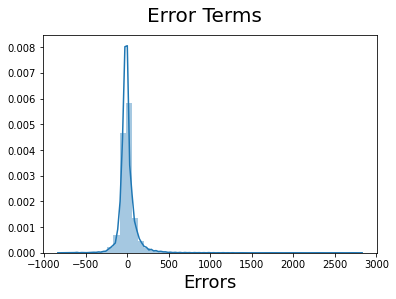

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 50)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
#Dividing into X and y
y_test = y_valid
X_test = OH_X_valid

In [ ]:
# Now let's use our model to make predictions.
X_train_new = best_X_train.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Scoring the model
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8365631348992852

Text(0, 0.5, 'y_pred')

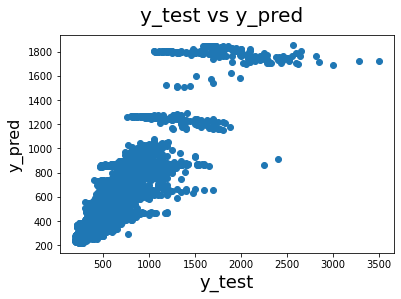

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [ ]:
print(lm.summary())

OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7100.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:08:24   Log-Likelihood:            -4.8506e+05
No. Observations:               79964   AIC:                         9.702e+05
Df Residuals:                   79906   BIC:                         9.708e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------